In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [2]:
train_file='D:/Evancer/Python/Projects/Project 3/counterfeit_train.csv'

In [3]:
md_tr=pd.read_csv(train_file)

In [4]:
md_tr.shape

(6818, 12)

In [5]:
md_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
Medicine_ID            6818 non-null object
Counterfeit_Weight     5652 non-null float64
DistArea_ID            6818 non-null object
Active_Since           6818 non-null int64
Medicine_MRP           6818 non-null float64
Medicine_Type          6818 non-null object
SidEffect_Level        6818 non-null object
Availability_rating    6818 non-null float64
Area_Type              6818 non-null object
Area_City_Type         6818 non-null object
Area_dist_level        6818 non-null object
Counterfeit_Sales      6818 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [6]:
md_tr.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [7]:
features_with_na=[features for features in md_tr.columns if md_tr[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(md_tr[feature].isnull().mean(),4),'% of missing values')

Counterfeit_Weight 0.171 % of missing values


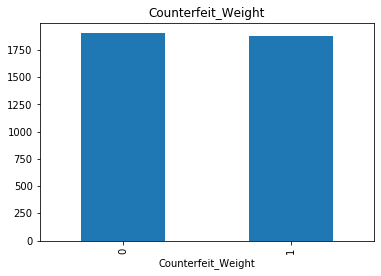

In [8]:
for feature in features_with_na:
    data=md_tr.copy()
    data[feature] = np.where(data[feature].isnull(), 1,0)
    data.groupby(feature)['Counterfeit_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [9]:
numerical_features=[feature for feature in md_tr.columns if md_tr[feature].dtypes!='O']
print('numerical variables:',len(numerical_features))

numerical variables: 5


In [10]:
numerical_features

['Counterfeit_Weight',
 'Active_Since',
 'Medicine_MRP',
 'Availability_rating',
 'Counterfeit_Sales']

## Temporal variable 

In [11]:
year_feature=[feature for feature in numerical_features if 'Active' in feature]

In [12]:
year_feature

['Active_Since']

In [13]:
for feature in year_feature:
    print(feature,md_tr[feature].unique())

Active_Since [1995 1983 2000 2007 1985 2005 1996 2002 1997]


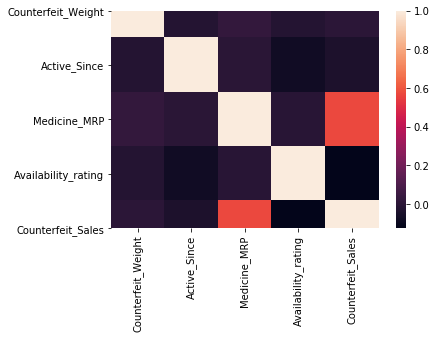

In [14]:
sns.heatmap(md_tr.corr('pearson'))

In [15]:
discrete_feature=[feature for feature in numerical_features if len(md_tr[feature].unique())<25]
print('discrete_variables:{}'.format(len(discrete_feature)))

discrete_variables:1


In [16]:
discrete_feature

['Active_Since']

In [17]:
categorical_features=[feature for feature in md_tr.columns if md_tr[feature].dtypes=='O']
categorical_features

['Medicine_ID',
 'DistArea_ID',
 'Medicine_Type',
 'SidEffect_Level',
 'Area_Type',
 'Area_City_Type',
 'Area_dist_level']

In [18]:
del md_tr['Medicine_ID']

In [19]:
md_tr.groupby(['DistArea_ID'])['Counterfeit_Sales'].mean()

DistArea_ID
Area010     445.985861
Area013    2407.024123
Area017    2476.010053
Area018    2106.573248
Area019     449.755770
Area027    3772.254917
Area035    2529.951912
Area045    2310.996675
Area046    2358.722955
Area049    2442.677445
Name: Counterfeit_Sales, dtype: float64

In [20]:
md_tr.groupby(['Medicine_Type'])['Counterfeit_Sales'].mean()

Medicine_Type
Analgesics            2091.241418
Antacids              2259.878564
Antibiotics           2397.201930
Antifungal            2444.055773
Antimalarial          2192.684238
Antipyretics          2292.723616
Antiseptics           2366.593219
Antiviral             2583.158763
Cardiac               2362.983092
Hreplacements         2376.118324
Mstablizers           2044.869218
MuscleRelaxants       2091.091800
OralContraceptives    2245.216825
Statins               2309.446292
Stimulants            2279.968747
Tranquilizers         2084.449652
Name: Counterfeit_Sales, dtype: float64

In [21]:
md_tr.groupby(['SidEffect_Level'])['Counterfeit_Sales'].mean()

SidEffect_Level
critical    2319.611173
mild        2259.599714
Name: Counterfeit_Sales, dtype: float64

In [22]:
md_tr.groupby(['Area_dist_level'])['Counterfeit_Sales'].mean()

Area_dist_level
High       2407.024123
Medium     2775.051246
Small      1998.408849
Unknown    1950.354460
Name: Counterfeit_Sales, dtype: float64

In [33]:
md_tr['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [24]:
md_tr.groupby(['Area_Type'])['Counterfeit_Sales'].mean()

Area_Type
CityLimits            3772.254917
DownTown              2421.278379
Industrial            2106.573248
MidTownResidential     447.847065
Name: Counterfeit_Sales, dtype: float64

In [25]:
md_tr['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

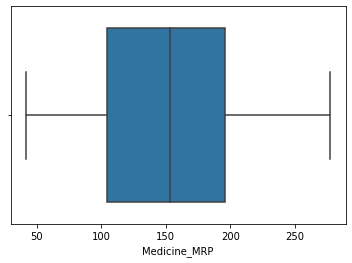

In [26]:
sns.boxplot(x='Medicine_MRP',data=md_tr)

In [27]:
md_tr.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


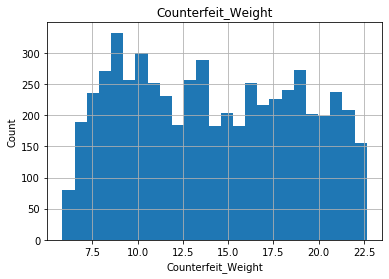

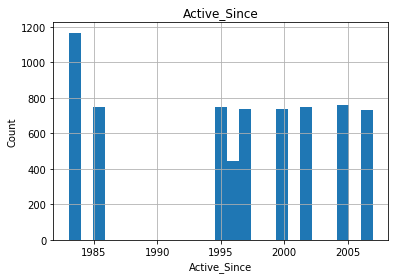

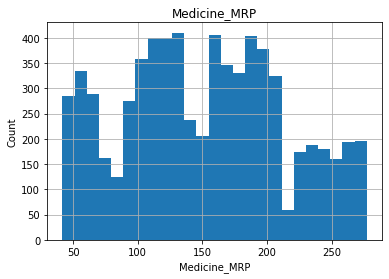

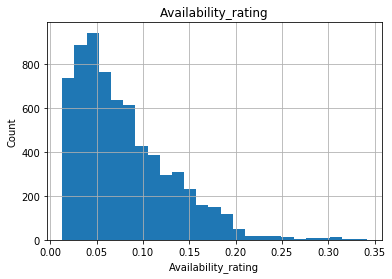

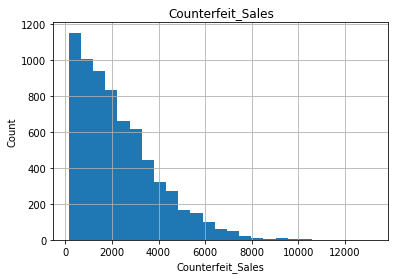

In [28]:
for feature in numerical_features:
    dat=md_tr.copy()
    dat[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

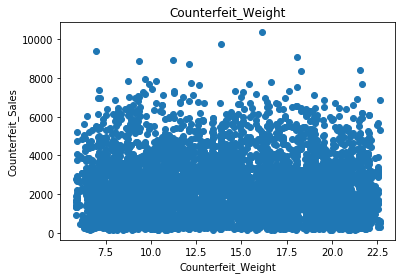

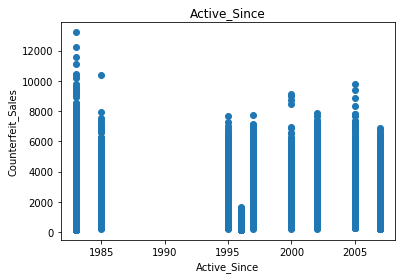

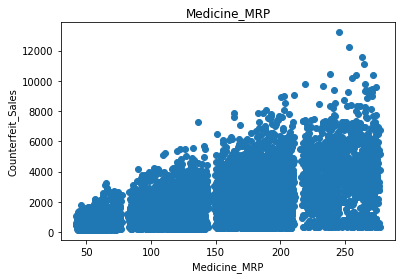

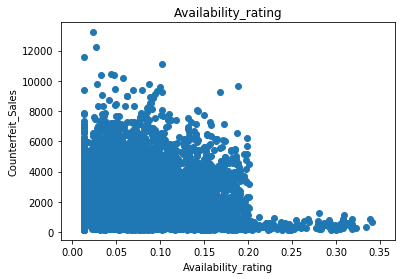

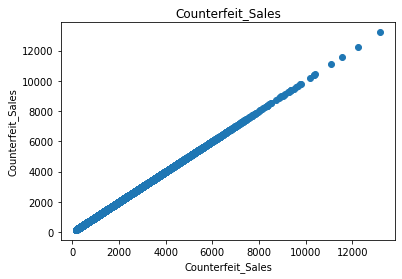

In [29]:
for feature in numerical_features:
    dat=md_tr.copy()
    plt.scatter(dat[feature],dat['Counterfeit_Sales'])
    plt.xlabel(feature)
    plt.ylabel('Counterfeit_Sales')
    plt.title(feature)
    plt.show()

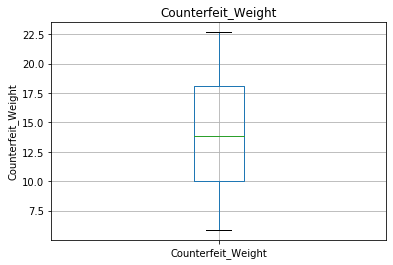

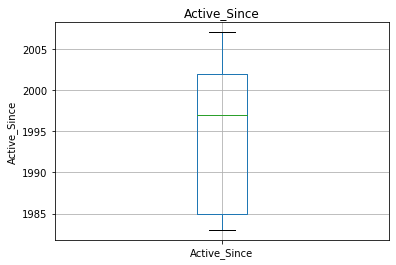

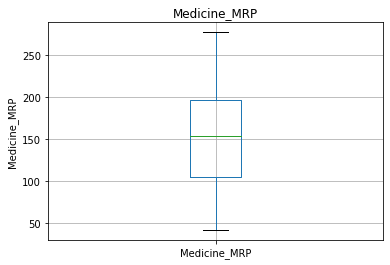

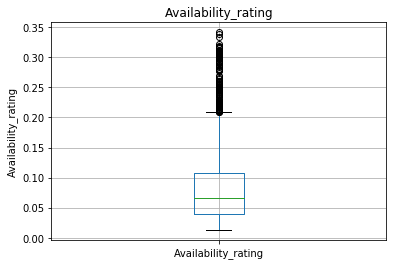

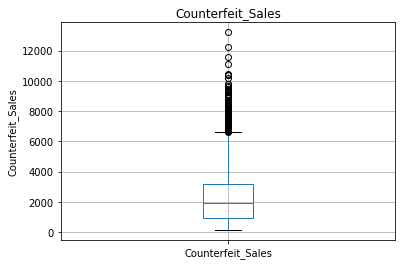

In [30]:
for feature in numerical_features:
    dat=md_tr.copy()
    dat.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [31]:
for feature in categorical_features:
    print('The feature is {} and number of cat is {}'.format(feature,len(md_tr[feature].unique())))

KeyError: 'Medicine_ID'

In [ ]:
for feature in categorical_features:
    data=md_tr.copy()
    data.groupby(feature)['Counterfeit_Sales'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Counterfeit_Sales')
    plt.title(feature)
    plt.show()

In [ ]:
md_tr.groupby('Medicine_MRP')['Counterfeit_Sales'].mean().plot()
plt.xlabel('Medicine_MRP')
plt.ylabel('Counterfeit_Sales')
plt.title('MRP vs Counterfeit_Sales')

In [ ]:
md_tr.groupby('Counterfeit_Weight')['Counterfeit_Sales'].mean().plot()
plt.xlabel('Medicine_MRP')
plt.ylabel('Counterfeit_Sales')
plt.title('MRP vs Counterfeit_Sales')

In [ ]:
md_tr['DistArea_ID']